In [36]:
%cd /Users/namir_oues/phd_code
import mdss.protein_data as prot
import mdss.property as p
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.graph as g
import pandas as pd
import tempfile
from IPython.display import Image, display
import os
import sys

/Users/namir_oues/Documents/PhD/MDSubSampler


In [37]:
trajectory_file = "/Users/namir_oues/Documents/PhD/MDSubSampler/data/input.xtc"
topology_file = "/Users/namir_oues/Documents/PhD/MDSubSampler/data/input.gro"
size_list = [0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0, 25.0, 50.0]
atom_selection= "name CA"
dissimilarity_measure = d.Bhattacharyya
temp_dir = tempfile.mkdtemp()
print(temp_dir)

/var/folders/m8/r77_hkt94w50_3m6b6qcwd780000gn/T/tmpgv0u3h5n


In [38]:
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)
print(p_data)

In [39]:
p_property = gp.RMSD(p_data, atom_selection, fit=True)
print(p_property)

In [40]:
p_property.calculate_property()
#print(p_property.property_vector)

In [41]:
sampler = s.RandomSampler(
            protein_property=p_property,
            protein_data=p_data,
            seed_number=1999,
            output_folder=temp_dir,
            file_prefix='scen1',
            dissimilarity_measure=dissimilarity_measure,
        )
print(sampler)

In [42]:
sampled_property = sampler.scan_sample_size(
            perc_vector=size_list,
            dissimilarity_threshold=None,
            step_recording = False
        )

<Figure size 432x288 with 0 Axes>

In [43]:
print(os.listdir(temp_dir))

['scen1_RMSD.npy', 'scen1_RMSD.xtc', 'scen1_RMSD.dat', 'scen1_RMSD_plot.png']


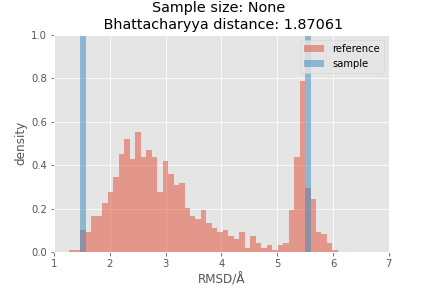

76 1.5540426507624348
935 5.514536865156922



In [11]:
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        display(Image(filename=fpath))
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)  
    

In [ ]:
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)   

In [ ]:
# Get the path to the temporary directory
temp_dir = tempfile.gettempdir()

# List the files in the temporary directory
file_list = os.listdir(temp_dir)

# Filter out directories from the file list
file_list = [file_name for file_name in file_list if not os.path.isdir(os.path.join(temp_dir, file_name))]

# Open each file and read its contents
for file_name in file_list:
    file_path = os.path.join(temp_dir, file_name)
    with open(file_path, 'r') as file:
        contents = file.read()
        print(f"Contents of {file_name}:")
        print(contents)

In [ ]:
file_list

In [ ]:
dissimilarity_object = d.Bhattacharyya(p_property, sampled_property)
